In [1]:
# Import Python Package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Python Package for Scikit Learn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\sehja\Downloads\untitled Folder2\uber.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [5]:
# calculate percentage of missing values in each column
missing_percent = (df.isnull().sum() / len(df)) * 100

# print number of null values in each column
print(missing_percent)

Unnamed: 0           0.0000
key                  0.0000
fare_amount          0.0000
pickup_datetime      0.0000
pickup_longitude     0.0000
pickup_latitude      0.0000
dropoff_longitude    0.0005
dropoff_latitude     0.0005
passenger_count      0.0000
dtype: float64


In [6]:
print(df['pickup_datetime'])


0         2015-05-07 19:52:06 UTC
1         2009-07-17 20:04:56 UTC
2         2009-08-24 21:45:00 UTC
3         2009-06-26 08:22:21 UTC
4         2014-08-28 17:47:00 UTC
                   ...           
199995    2012-10-28 10:49:00 UTC
199996    2014-03-14 01:09:00 UTC
199997    2009-06-29 00:42:00 UTC
199998    2015-05-20 14:56:25 UTC
199999    2010-05-15 04:08:00 UTC
Name: pickup_datetime, Length: 200000, dtype: object


In [7]:
# convert pickup_datetime column to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# create new columns for date and time
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_time'] = df['pickup_datetime'].dt.time

In [8]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00


In [9]:
df = df.drop('pickup_datetime', axis=1)

In [10]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time
0,24238194,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06
1,27835199,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56
2,44984355,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00
3,25894730,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21
4,17610152,2014-08-28 17:47:00.000000188,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00


In [11]:
df = df.drop('Unnamed: 0', axis=1)

In [12]:
df.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time
0,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06
1,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56
2,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00
3,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21
4,2014-08-28 17:47:00.000000188,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00


In [13]:
# convert key column to datetime format
df['key'] = pd.to_datetime(df['key'])

# create new columns for date and time
df['Key_date'] = df['key'].dt.date
df['Key_time'] = df['key'].dt.time

In [14]:
df = df.drop('key', axis=1)

In [15]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_time,Key_date,Key_time
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06,2015-05-07,19:52:06
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56,2009-07-17,20:04:56
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00,2009-08-24,21:45:00
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21,2009-06-26,08:22:21
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00,2014-08-28,17:47:00


In [16]:
# calculate percentage of missing values in each column
missing_percent = (df.isnull().sum() / len(df)) * 100

# print number of null values in each column
print(missing_percent)

fare_amount          0.0000
pickup_longitude     0.0000
pickup_latitude      0.0000
dropoff_longitude    0.0005
dropoff_latitude     0.0005
passenger_count      0.0000
pickup_date          0.0000
pickup_time          0.0000
Key_date             0.0000
Key_time             0.0000
dtype: float64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    200000 non-null  int64  
 6   pickup_date        200000 non-null  object 
 7   pickup_time        200000 non-null  object 
 8   Key_date           200000 non-null  object 
 9   Key_time           200000 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 15.3+ MB


In [18]:
df.shape

(200000, 10)

In [22]:
df['pickup_date'] = pd.to_datetime(df['pickup_date'])
df['pickup_year'] = df['pickup_date'].dt.year
df['pickup_month'] = df['pickup_date'].dt.month
df['pickup_day'] = df['pickup_date'].dt.day
df = df.drop('pickup_date', axis=1)

In [23]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_time,Key_date,Key_time,pickup_year,pickup_month,pickup_day
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19:52:06,2015-05-07,19:52:06,2015,5,7
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20:04:56,2009-07-17,20:04:56,2009,7,17
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21:45:00,2009-08-24,21:45:00,2009,8,24
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,08:22:21,2009-06-26,08:22:21,2009,6,26
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17:47:00,2014-08-28,17:47:00,2014,8,28


In [80]:
max_passenger_count = df["passenger_count"].max()
print("Max passenger count:", max_passenger_count)


Max passenger count: 6


In [72]:
# max_passenger_count = df['passenger_count'].max()
# df = df.drop(df[df['passenger_count'] == max_passenger_count].index)


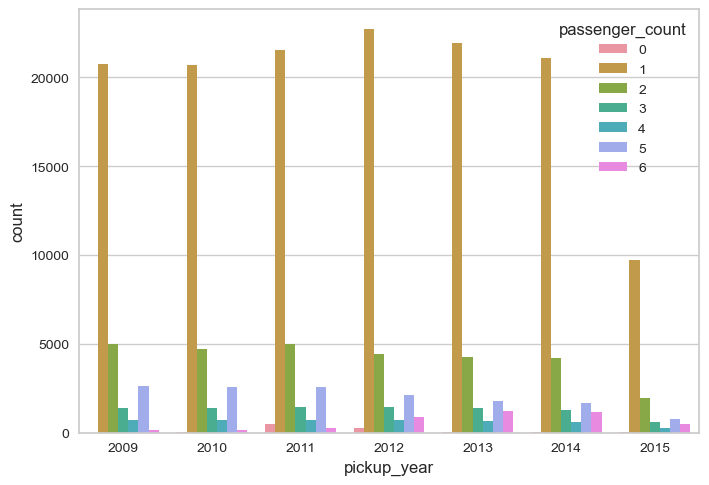

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="pickup_year", hue="passenger_count", data=df)
plt.show()


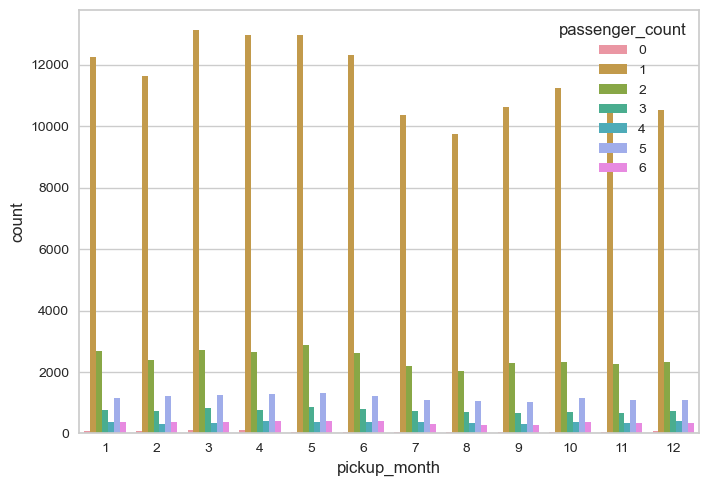

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="pickup_month", hue="passenger_count", data=df)
plt.show()


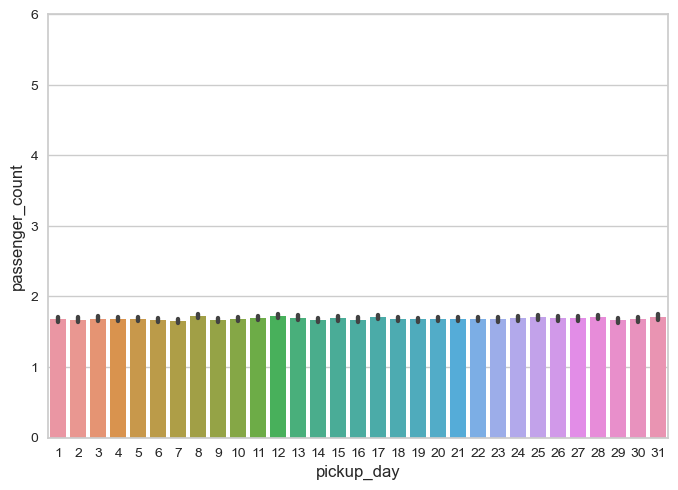

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="pickup_day", y="passenger_count", data=df)
plt.yticks(range(df['passenger_count'].max() + 1))
plt.show()


C:\Users\sehja\AppData\Local\Temp\ipykernel_14324\238486687.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


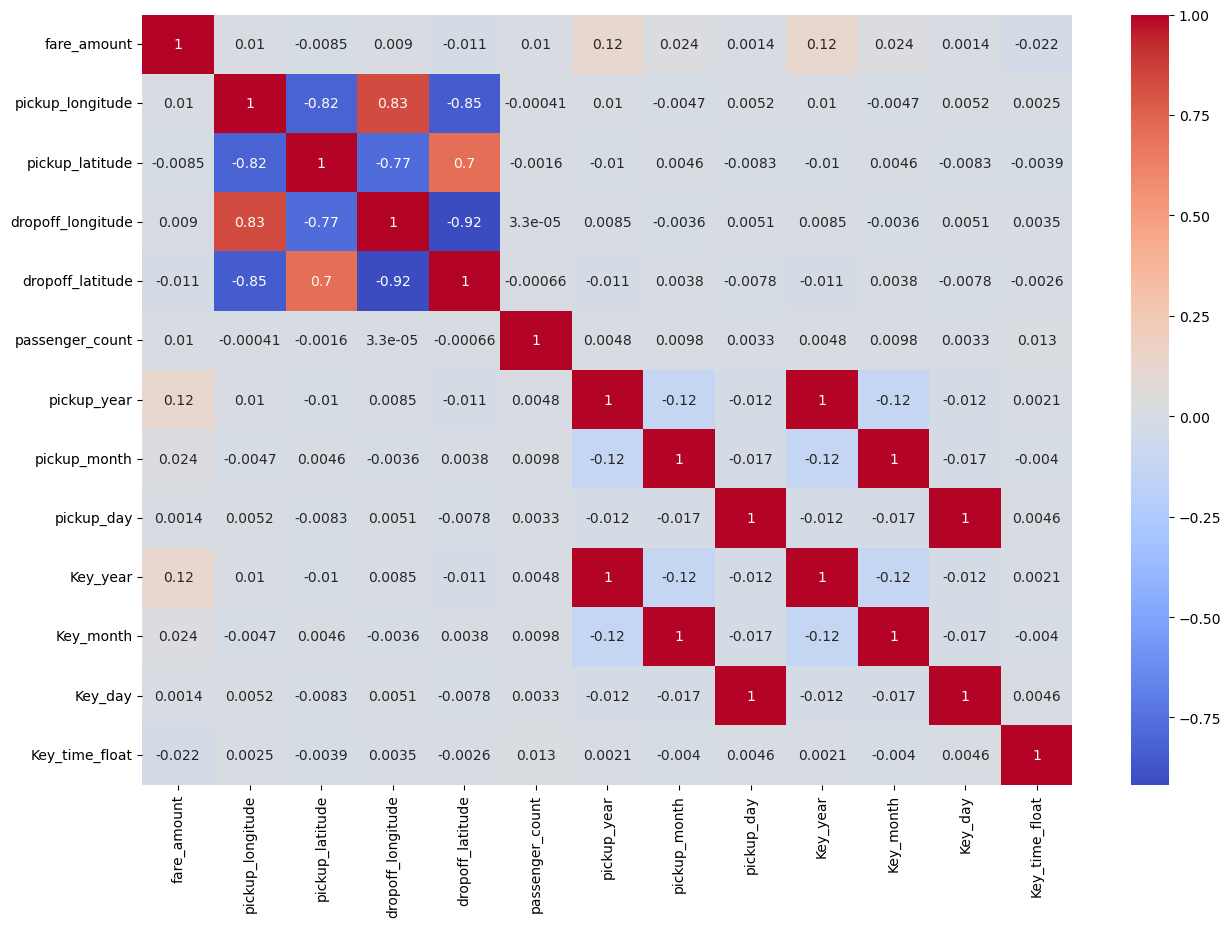

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [36]:
# compute correlation matrix
corr_matrix = df.corr()

# display correlation matrix
print(corr_matrix)

                   fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.010457        -0.008481   
pickup_longitude      0.010457          1.000000        -0.816461   
pickup_latitude      -0.008481         -0.816461         1.000000   
dropoff_longitude     0.008986          0.833026        -0.774787   
dropoff_latitude     -0.011014         -0.846324         0.702367   
passenger_count       0.010150         -0.000414        -0.001560   
pickup_year           0.118335          0.009966        -0.010233   
pickup_month          0.023814         -0.004665         0.004625   
pickup_day            0.001374          0.005184        -0.008264   
Key_year              0.118335          0.009966        -0.010233   
Key_month             0.023814         -0.004665         0.004625   
Key_day               0.001374          0.005184        -0.008264   
Key_time_float       -0.021679          0.002502        -0.003895   

                   dropoff_longit

C:\Users\sehja\AppData\Local\Temp\ipykernel_14324\2381142767.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [46]:
from pycaret.regression import *


In [48]:
df2 = df.copy()

In [49]:
s = setup(df2, target='fare_amount', fold=20, session_id=123)
best = compare_models()

# AUC (Area Under the Curve): a measure of the model's ability to distinguish between the positive and negative classes.
# Kappa:measure agreement between the model's predictions and the true labels taking into account the possibility of agreement occurring by chance.
# MCC (Matthews Correlation Coefficient): a measure of the correlation between the model's predictions and the true labels.
# TT (Training Time): the time taken to train the model.

,Description,Value
0,Session id,123
1,Target,fare_amount
2,Target type,Regression
3,Original data shape,"(200000, 15)"
4,Transformed data shape,"(200000, 15)"
5,Transformed train set shape,"(140000, 15)"
6,Transformed test set shape,"(60000, 15)"
7,Numeric features,12
8,Categorical features,2
9,Rows with missing values,0.0%


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.0155,23.4007,4.7770,0.7690,0.2590,0.2261,23.5275
xgboost,Extreme Gradient Boosting,2.0996,23.7242,4.8053,0.7660,0.2666,0.2405,2.3030
lightgbm,Light Gradient Boosting Machine,2.3087,24.8167,4.9225,0.7549,0.2864,0.2740,0.7390
gbr,Gradient Boosting Regressor,2.9915,29.3970,5.3767,0.7081,0.3476,0.3636,4.4145
et,Extra Trees Regressor,2.8951,32.2030,5.6309,0.6798,0.3305,0.3372,19.3985
dt,Decision Tree Regressor,2.8830,47.8818,6.8607,0.5187,0.3550,0.3116,1.0005
lr,Linear Regression,5.9831,97.7151,9.8709,0.0161,0.5704,0.6608,1.2460
ridge,Ridge Regression,5.9831,97.7151,9.8709,0.0161,0.5704,0.6608,0.7515
br,Bayesian Ridge,5.9831,97.7151,9.8709,0.0161,0.5704,0.6608,0.8080
lar,Least Angle Regression,5.9841,97.7428,9.8722,0.0158,0.5704,0.6609,0.7615


Processing:   0%|          | 0/81 [00:00<?, ?it/s]